In [2]:
import pandas as pd
import math
import numpy as np

In [3]:
#df = pd.read_csv('german_text_data.txt', delimiter=' ')
#C:\Users\griev\Credit score prediction\Test Credit score prediction
df_load = pd.read_csv('C:/Users/griev/Credit score prediction/german.csv')
#df_load.head()

In [4]:
df_load.columns
#duration in month
#credit amount
#

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account', 'Credit history', 'Purpose',
       'Savings account/bonds', 'Present employment since',
       'Other debtors / guarantors', 'Property', 'Other installment plans',
       'Housing', 'Occupation', 'Telephone', 'Foreign worker',
       'Personal status and sex', 'Sex', 'Personal status', 'Outcome',
       'Risk(Outcome_text)'],
      dtype='object')

In [5]:
df_load.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account,Credit history,Purpose,...,Other installment plans,Housing,Occupation,Telephone,Foreign worker,Personal status and sex,Sex,Personal status,Outcome,Risk(Outcome_text)
0,6,1169,4,4,67,2,1,< 0 DM,critical account/other credits existing (not a...,radio_television,...,none,own,skilledEmployee_or_official,"yes, registered under the customers name",Yes,male - single,male,single,1,Good
1,48,5951,2,2,22,1,1,0 <= and < 200 DM,existing credits paid back duly till now,radio_television,...,none,own,skilledEmployee_or_official,none,Yes,female - divorced_separated_married,female,divorced_separated_married,2,Bad
2,12,2096,2,3,49,1,2,no checking account,critical account/other credits existing (not a...,education,...,none,own,unskilled_resident,none,Yes,male - single,male,single,1,Good
3,42,7882,2,4,45,1,2,< 0 DM,existing credits paid back duly till now,furniture_equipment,...,none,for_free,skilledEmployee_or_official,none,Yes,male - single,male,single,1,Good
4,24,4870,3,4,53,2,2,< 0 DM,delay in paying off in the past,car_new,...,none,for_free,skilledEmployee_or_official,none,Yes,male - single,male,single,2,Bad


In [6]:
df_load['disposible_income']=round(((df_load['Credit amount']/df_load['Duration in month'])/df_load['Installment rate in percentage of disposable income'])*100,0)

In [7]:
df_load['disposible_income']

0      4871.0
1      6199.0
2      8733.0
3      9383.0
4      6764.0
        ...  
995    4822.0
996    3214.0
997    1675.0
998    1025.0
999    3390.0
Name: disposible_income, Length: 1000, dtype: float64

In [8]:
df_load.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Outcome,disposible_income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000,8616.123000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,14889.254022
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,631.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,2500.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,4403.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,9383.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000,248267.000000


In [9]:
def derive_duration_group(dur):
    if dur <= 5:
        return "Below_5"
    elif dur > 5 and dur <= 10:
        return "six_10"
    elif dur >10 and dur <= 15:
        return "eleven_15"
    elif dur > 15 and dur <= 20:
        return "sixteen_20"
    elif dur > 20 and dur <= 25:
        return "twenty1_25" 
    elif dur > 25 and dur <= 30:
        return "twenty6_30"
    elif dur >30 and dur <= 35:
        return "thirty1_35"
    elif dur > 35 and dur <= 40:
        return "thirty6_40"
    elif dur > 40 and dur <= 45:
        return "forty1_45"
    elif dur > 45 and dur <= 50:
        return "forty6_50"
    elif dur > 50 and dur <= 55:
        return "fiftyone_55"
    elif dur > 55 and dur <= 60:
        return "fifty6_60"
    elif dur > 60 and dur <= 65:
        return "sixty1_65"
    elif dur > 65 and dur <= 70:
        return "sixty6_70"
    elif dur > 70 and dur <= 75:
        return "seventy1_75"
    else:
        return "seventysix_and_above"
    


# Apply the function to create a new column 'Duration in month Group'
df_load['duration_group'] = df_load['Duration in month'].apply(derive_duration_group)

In [10]:
#Disposible income group
def derive_dispinc_group(dispincome):
    if dispincome <= 2000:
        return "Below_2000"
    elif dispincome >2000 and dispincome <= 4000:
        return "twothouone_4000"
    elif dispincome >4000 and dispincome <= 6000:
        return "fourthouone_6000"
    elif dispincome >6000 and dispincome <= 8000:
        return "sixtyone_8000"
    elif dispincome >8000 and dispincome <=10000:
        return "eitthouone_10000"
    elif dispincome >10000 and dispincome <=12000:
        return "tenthouone_12000"
    elif dispincome >12000 and dispincome <= 14000:
        return "twelvethouone_14000"
    elif dispincome >14000 and dispincome <= 16000:
        return "forteenthouone_16000"
    elif dispincome >16000 and dispincome <= 18000:
        return "sixteenthouone_18000"
    else:
        return "Above_18001"

df_load['disposible_income_group'] = df_load['disposible_income'].apply(derive_dispinc_group)

In [11]:
emp_len_mapping = {'< 1 year':'Less_than_1_year', '1<= and < 4 years':'one_4_years','4<= and < 7 years':'four_7_years',
                  '>=7 years':'More_than_7_years'
                  }
df_load['Employment_length'] = df_load['Present employment since'].replace(emp_len_mapping)
#df_load.head()

In [12]:
df_load[['Employment_length']]

,Employment_length
0,More_than_7_years
1,one_4_years
2,four_7_years
3,four_7_years
4,one_4_years
...,...
995,four_7_years
996,one_4_years
997,More_than_7_years
998,one_4_years


In [13]:
def derive_age_group(age):
    if age <= 18:
        return "Below_18_years_old"
    elif age > 18 and age <= 25:
        return "eigteen_25_years_old"
    elif age > 25 and age <= 30:
        return "twentysix_30_years_old"
    elif age > 30 and age <= 35:
        return "thiryone_35_years_old"
    elif age > 35 and age <= 40:
        return "thirtysix_40_years_old" 
    elif age > 40 and age <= 45:
        return "fortyone_45_years_old"
    elif age > 45 and age <= 50:
        return "fortysix_50_years_old"
    elif age > 50 and age <= 55:
        return "fiftyone_55_years_old"
    elif age > 55 and age <= 60:
        return "fiftysix_60_years_old"
    elif age > 60 and age <= 65:
        return "sixtyone_65_years_old"
    elif age > 65 and age <= 70:
        return "sixtysix_70_years_old"
    elif age > 70 and age <= 75:
        return "seventyone_75_years_old"
    else:
        return "seventysix_and_above"

# Apply the function to create a new column 'Age Group'
df_load['Age_group'] = df_load['Age'].apply(derive_age_group)

In [14]:
def derive_credit_group(credamt):
    if credamt <= 2000:
        return "Below_2000"
    elif credamt >2000 and credamt <= 4000:
        return "twothouone_4000"
    elif credamt >4000 and credamt <= 6000:
        return "fourthouone_6000"
    elif credamt >6000 and credamt <= 8000:
        return "sixtyone_8000"
    elif credamt >8000 and credamt <=10000:
        return "eitthouone_10000"
    elif credamt >10000 and credamt <=12000:
        return "tenthouone_12000"
    elif credamt >12000 and credamt <= 14000:
        return "twelvethouone_14000"
    elif credamt >14000 and credamt <= 16000:
        return "forteenthouone_16000"
    elif credamt >16000 and credamt <= 18000:
        return "sixteenthouone_18000"
    else:
        return "Above_18001"

df_load['Credit_amount_group'] = df_load['Credit amount'].apply(derive_credit_group)

In [15]:
def derive_resi_len(resilen):
    if resilen == 1:
        return "one_year_or_less"
    elif resilen ==2:
        return "two_years"
    elif resilen ==3:
        return "three_years"
    else:
        return "More_than_4_years"
df_load['Residence_length']=df_load['Present residence since'].apply(derive_resi_len)

In [16]:
df_load[['Present residence since','Residence_length']]

,Present residence since,Residence_length
0,4,More_than_4_years
1,2,two_years
2,3,three_years
3,4,More_than_4_years
4,4,More_than_4_years
...,...,...
995,4,More_than_4_years
996,4,More_than_4_years
997,4,More_than_4_years
998,4,More_than_4_years


In [17]:
old_ODG = 'Other debtors / guarantors'
new_ODG = 'Other_debtors_or_guarantors'
df_load.rename(columns = {old_ODG:new_ODG}, inplace = True)

In [18]:
old_ps = 'Personal status'
new_ps = 'Personal_status'
df_load.rename(columns = {old_ps:new_ps}, inplace = True)

In [19]:
df_load.columns

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account', 'Credit history', 'Purpose',
       'Savings account/bonds', 'Present employment since',
       'Other_debtors_or_guarantors', 'Property', 'Other installment plans',
       'Housing', 'Occupation', 'Telephone', 'Foreign worker',
       'Personal status and sex', 'Sex', 'Personal_status', 'Outcome',
       'Risk(Outcome_text)', 'disposible_income', 'duration_group',
       'disposible_income_group', 'Employment_length', 'Age_group',
       'Credit_amount_group', 'Residence_length'],
      dtype='object')

In [20]:
df_load[['Personal_status']]

,Personal_status
0,single
1,divorced_separated_married
2,single
3,single
4,single
...,...
995,divorced_separated_married
996,divorced_separated
997,single
998,single


In [21]:
def der_depend(depen):
    if depen ==1:
        return "one"
    else:
        return "two_or_more"
    
df_load['Number_of_dependents'] = df_load['Number of people being liable to provide maintenance for'].apply(der_depend)

In [22]:
df_load.columns

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account', 'Credit history', 'Purpose',
       'Savings account/bonds', 'Present employment since',
       'Other_debtors_or_guarantors', 'Property', 'Other installment plans',
       'Housing', 'Occupation', 'Telephone', 'Foreign worker',
       'Personal status and sex', 'Sex', 'Personal_status', 'Outcome',
       'Risk(Outcome_text)', 'disposible_income', 'duration_group',
       'disposible_income_group', 'Employment_length', 'Age_group',
       'Credit_amount_group', 'Residence_length', 'Number_of_dependents'],
      dtype='object')

In [23]:
df_trim = df_load[['duration_group',
       'disposible_income_group','Purpose', 'Occupation', 'Employment_length',
'Credit_amount_group','Other_debtors_or_guarantors', 'Housing','Residence_length','Age_group',
   'Sex',  'Personal_status','Number_of_dependents',
'Outcome', 'Risk(Outcome_text)']]
#df_trim.describe()

# Credit Information Bureau of India Limited (CIBIL) Score

In [24]:
#df_discret.head(2)
offset = 600
PDO = 20
Factor = PDO/math.log(2)
#print(Factor)


In [25]:
offset_test = 50
PDO = 20
Factor = PDO/math.log(2)

# Credit History

In [26]:
#credHist_discret['credhist_score'] =round( offset+(Factor*credHist_discret.CredHisWoE),0)
#credHist_discret
#nominal

# duration_group

In [27]:
#create pivote table
dur_discret = (pd.pivot_table(df_trim,
                              index ='duration_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
dur_discret['DGood%'] = dur_discret['Good']/(dur_discret['Good']+dur_discret['Bad'])
dur_discret['DBad%']=1-dur_discret['DGood%']
#calculate WoE
dur_discret['durWoE'] = np.log((dur_discret['DGood%']) / (dur_discret['DBad%']) )

#converting probability to score
dur_discret['dur_score'] =round( offset+(Factor*dur_discret['durWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_trim,dur_discret[['duration_group','dur_score']], on='duration_group', how='left')
df_discret.head(10)

,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,Sex,Personal_status,Number_of_dependents,Outcome,Risk(Outcome_text),dur_score
0,six_10,fourthouone_6000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,sixtysix_70_years_old,male,single,one,1,Good,647.0
1,forty6_50,sixtyone_8000,radio_television,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,own,two_years,eigteen_25_years_old,female,divorced_separated_married,one,2,Bad,592.0
2,eleven_15,eitthouone_10000,education,unskilled_resident,four_7_years,twothouone_4000,none,own,three_years,fortysix_50_years_old,male,single,two_or_more,1,Good,634.0
3,forty1_45,eitthouone_10000,furniture_equipment,skilledEmployee_or_official,four_7_years,sixtyone_8000,guarantor,for_free,More_than_4_years,fortyone_45_years_old,male,single,two_or_more,1,Good,607.0
4,twenty1_25,sixtyone_8000,car_new,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,for_free,More_than_4_years,fiftyone_55_years_old,male,single,two_or_more,2,Bad,624.0
5,thirty6_40,twelvethouone_14000,education,unskilled_resident,one_4_years,eitthouone_10000,none,for_free,More_than_4_years,thiryone_35_years_old,male,single,two_or_more,1,Good,607.0
6,twenty1_25,twothouone_4000,furniture_equipment,skilledEmployee_or_official,More_than_7_years,twothouone_4000,none,own,More_than_4_years,fiftyone_55_years_old,male,single,one,1,Good,624.0
7,thirty6_40,eitthouone_10000,car_used,management_or_selfEmployed_or_highlyQualifiedE...,one_4_years,sixtyone_8000,none,rent,two_years,thiryone_35_years_old,male,single,one,1,Good,607.0
8,eleven_15,twelvethouone_14000,radio_television,unskilled_resident,four_7_years,twothouone_4000,none,own,More_than_4_years,sixtyone_65_years_old,male,divorced_separated,one,1,Good,634.0
9,twenty6_30,fourthouone_6000,car_new,management_or_selfEmployed_or_highlyQualifiedE...,unemployed,fourthouone_6000,none,own,two_years,twentysix_30_years_old,male,married_widowed,one,2,Bad,620.0


# disposible_income_group

In [28]:
#create pivote table
disinc_discret = (pd.pivot_table(df_trim,
                              index ='disposible_income_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
disinc_discret['DIGood%'] = disinc_discret['Good']/(disinc_discret['Good']+disinc_discret['Bad'])
disinc_discret['DIBad%']=1-disinc_discret['DIGood%']
#calculate WoE
disinc_discret['disincWoE'] = np.log((disinc_discret['DIGood%']) / (disinc_discret['DIBad%']) )

#converting probability to score
disinc_discret['disinc_score'] =round( offset+(Factor*disinc_discret['disincWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,disinc_discret[['disposible_income_group','disinc_score']], on='disposible_income_group', how='left')
#df_discret.head(10)

In [29]:
df_discret

,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,Sex,Personal_status,Number_of_dependents,Outcome,Risk(Outcome_text),dur_score,disinc_score
0,six_10,fourthouone_6000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,sixtysix_70_years_old,male,single,one,1,Good,647.0,625.0
1,forty6_50,sixtyone_8000,radio_television,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,own,two_years,eigteen_25_years_old,female,divorced_separated_married,one,2,Bad,592.0,635.0
2,eleven_15,eitthouone_10000,education,unskilled_resident,four_7_years,twothouone_4000,none,own,three_years,fortysix_50_years_old,male,single,two_or_more,1,Good,634.0,623.0
3,forty1_45,eitthouone_10000,furniture_equipment,skilledEmployee_or_official,four_7_years,sixtyone_8000,guarantor,for_free,More_than_4_years,fortyone_45_years_old,male,single,two_or_more,1,Good,607.0,623.0
4,twenty1_25,sixtyone_8000,car_new,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,for_free,More_than_4_years,fiftyone_55_years_old,male,single,two_or_more,2,Bad,624.0,635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,eleven_15,fourthouone_6000,furniture_equipment,unskilled_resident,four_7_years,Below_2000,none,own,More_than_4_years,thiryone_35_years_old,female,divorced_separated_married,one,1,Good,634.0,625.0
996,twenty6_30,twothouone_4000,car_used,management_or_selfEmployed_or_highlyQualifiedE...,one_4_years,twothouone_4000,none,own,More_than_4_years,thirtysix_40_years_old,male,divorced_separated,one,1,Good,620.0,627.0
997,eleven_15,Below_2000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,thirtysix_40_years_old,male,single,one,1,Good,634.0,608.0
998,forty1_45,Below_2000,radio_television,skilledEmployee_or_official,one_4_years,Below_2000,none,for_free,More_than_4_years,eigteen_25_years_old,male,single,one,2,Bad,607.0,608.0


# Purpose

In [30]:
#create pivote table
purpose_discret = (pd.pivot_table(df_trim,
                              index ='Purpose', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
purpose_discret['PGood%'] = purpose_discret['Good']/(purpose_discret['Good']+purpose_discret['Bad'])
purpose_discret['PBad%']=1-purpose_discret['PGood%']
#calculate WoE
purpose_discret['PurposeWoE'] = np.log((purpose_discret['PGood%']) / (purpose_discret['PBad%']) )

#converting probability to score
purpose_discret['purpose_score'] =round( offset+(Factor*purpose_discret['PurposeWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,purpose_discret[['Purpose','purpose_score']], on='Purpose', how='left')
#df_discret.head(10)

In [31]:
purpose_discret
#nominal

Risk(Outcome_text),Purpose,Bad,Good,PGood%,PBad%,PurposeWoE,purpose_score
0,business,34,63,0.649485,0.350515,0.616774,618.0
1,car_new,89,145,0.619658,0.380342,0.488097,614.0
2,car_used,17,86,0.834951,0.165049,1.621134,647.0
3,domestic_appliances,4,8,0.666667,0.333333,0.693147,620.0
4,education,22,28,0.560000,0.440000,0.241162,607.0
5,furniture_equipment,58,123,0.679558,0.320442,0.751741,622.0
6,others,5,7,0.583333,0.416667,0.336472,610.0
7,radio_television,62,218,0.778571,0.221429,1.257361,636.0
8,repairs,8,14,0.636364,0.363636,0.559616,616.0
9,retraining,1,8,0.888889,0.111111,2.079442,660.0


# 'Occupation',

In [32]:
#nominal
#create pivot table
occu_discret = (pd.pivot_table(df_trim,
                              index ='Occupation', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#occu_discret['occuBad%'] = occu_discret['Bad']/occu_discret ['Bad'].sum()
occu_discret ['occuGood%'] = occu_discret ['Good']/(occu_discret ['Good']+occu_discret ['Bad'])
occu_discret['occuBad%'] = 1-occu_discret ['occuGood%']

#calculate WoE
occu_discret ['OccupationWoE'] = np.log((occu_discret ['occuGood%']) / (occu_discret ['occuBad%']) )


#converting probability to score
occu_discret ['Occupation_score']  =round( offset+(Factor*occu_discret ['OccupationWoE'] ),0)


#Merge to the main dataframe
df_discret = pd.merge(df_discret,occu_discret [['Occupation','Occupation_score']], 
                      on='Occupation', how='left')
#occu_discret

In [33]:
df_discret.head()

,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,Sex,Personal_status,Number_of_dependents,Outcome,Risk(Outcome_text),dur_score,disinc_score,purpose_score,Occupation_score
0,six_10,fourthouone_6000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,sixtysix_70_years_old,male,single,one,1,Good,647.0,625.0,636.0,625.0
1,forty6_50,sixtyone_8000,radio_television,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,own,two_years,eigteen_25_years_old,female,divorced_separated_married,one,2,Bad,592.0,635.0,636.0,625.0
2,eleven_15,eitthouone_10000,education,unskilled_resident,four_7_years,twothouone_4000,none,own,three_years,fortysix_50_years_old,male,single,two_or_more,1,Good,634.0,623.0,607.0,627.0
3,forty1_45,eitthouone_10000,furniture_equipment,skilledEmployee_or_official,four_7_years,sixtyone_8000,guarantor,for_free,More_than_4_years,fortyone_45_years_old,male,single,two_or_more,1,Good,607.0,623.0,622.0,625.0
4,twenty1_25,sixtyone_8000,car_new,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,for_free,More_than_4_years,fiftyone_55_years_old,male,single,two_or_more,2,Bad,624.0,635.0,614.0,625.0


# 'Length of employment'

In [34]:
 
#create pivote table
PE_discret = (pd.pivot_table(df_trim,
                              index ='Employment_length', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#PE_discret ['PEBad%'] = PE_discret ['Bad']/PE_discret ['Bad'].sum()
PE_discret ['PEGood%'] = PE_discret ['Good']/(PE_discret ['Good']+PE_discret ['Bad'])
PE_discret ['PEBad%']=1-PE_discret ['PEGood%']
#calculate WoE
PE_discret ['PresentEmployemntSinceWoE'] = np.log((PE_discret ['PEGood%']) / (PE_discret ['PEBad%']) )

#converting probability to score
PE_discret ['PresentEmployemntSince_score'] =round( offset+(Factor*PE_discret ['PresentEmployemntSinceWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,PE_discret [['Employment_length','PresentEmployemntSince_score']], on='Employment_length', how='left')

In [35]:
 PE_discret

Risk(Outcome_text),Employment_length,Bad,Good,PEGood%,PEBad%,PresentEmployemntSinceWoE,PresentEmployemntSince_score
0,Less_than_1_year,70,102,0.593023,0.406977,0.376478,611.0
1,More_than_7_years,64,189,0.747036,0.252964,1.082864,631.0
2,four_7_years,39,135,0.775862,0.224138,1.241713,636.0
3,one_4_years,104,235,0.693215,0.306785,0.815195,624.0
4,unemployed,23,39,0.629032,0.370968,0.528067,615.0


# Credit amount

In [36]:

#create pivote table
CA_discret = (pd.pivot_table(df_trim,
                              index ='Credit_amount_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#CA_discret ['caBad%'] = CA_discret ['Bad']/CA_discret ['Bad'].sum()
CA_discret ['caGood%'] = CA_discret ['Good']/(CA_discret ['Good']+CA_discret ['Bad'])
CA_discret ['caBad%'] = 1-CA_discret ['caGood%']
#calculate WoE
CA_discret ['CreditAmtWoE'] = np.log((CA_discret ['caGood%']) / (CA_discret ['caBad%']) )

#converting probability to score
CA_discret ['CreditAmt_score'] =round( offset+(Factor*CA_discret ['CreditAmtWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,CA_discret [['Credit_amount_group','CreditAmt_score']], on='Credit_amount_group', how='left')
#df_discret.head(10)

In [37]:
#CA_discret
#ordinal

# 'Other debtors / guarantors'

In [38]:
#create pivot table
Odb_discret = (pd.pivot_table(df_trim,
                              index ='Other_debtors_or_guarantors', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#Odb_discret['odbBad%'] = Odb_discret['Bad']/Odb_discret ['Bad'].sum()
Odb_discret ['odbGood%'] = Odb_discret ['Good']/(Odb_discret ['Good']+Odb_discret ['Bad'])
Odb_discret['odbBad%'] = 1-Odb_discret ['odbGood%']
#calculate WoE
Odb_discret ['OtherdebtorsWoE'] = np.log((Odb_discret ['odbGood%']) / (Odb_discret ['odbBad%']) )


#converting probability to score
Odb_discret ['Otherdebtors_score']  =round( offset+(Factor*Odb_discret ['OtherdebtorsWoE'] ),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,Odb_discret [['Other_debtors_or_guarantors','Otherdebtors_score']], 
                      on='Other_debtors_or_guarantors', how='left')

#  'Housing'
       

In [39]:
#nominal
#create pivot table
hs_discret = (pd.pivot_table(df_trim,
                              index ='Housing', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#hs_discret['hsBad%'] = hs_discret['Bad']/hs_discret ['Bad'].sum()
hs_discret ['hsGood%'] = hs_discret ['Good']/(hs_discret ['Good']+hs_discret ['Bad'])
hs_discret['hsBad%']=1-hs_discret ['hsGood%']

#calculate WoE
hs_discret ['HousingWoE'] = np.log((hs_discret ['hsGood%']) / (hs_discret ['hsBad%']) )


#converting probability to score
hs_discret ['Housing_score']  =round( offset+(Factor*hs_discret ['HousingWoE'] ),0)


#Merge to the main dataframe
df_discret = pd.merge(df_discret,hs_discret [['Housing','Housing_score']], 
                      on='Housing', how='left')
hs_discret

Risk(Outcome_text),Housing,Bad,Good,hsGood%,hsBad%,HousingWoE,Housing_score
0,for_free,44,64,0.592593,0.407407,0.374693,611.0
1,own,186,527,0.739130,0.260870,1.041454,630.0
2,rent,70,109,0.608939,0.391061,0.442853,613.0


# 'length of residence'

In [40]:
#create pivot table
prs_discret = (pd.pivot_table(df_trim,
                              index ='Residence_length', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#prs_discret['prsBad%'] = prs_discret['Bad']/prs_discret ['Bad'].sum()
prs_discret ['prsGood%'] = prs_discret ['Good']/(prs_discret ['Good']+prs_discret ['Bad'])
prs_discret['prsBad%'] = 1-prs_discret ['prsGood%']
#calculate WoE
prs_discret ['PresentResidenceSinceWoE'] = np.log((prs_discret ['prsBad%']) / (prs_discret ['prsGood%']) )

#converting probability to score
prs_discret ['PresentResidenceSince_score']  =round( offset+(Factor*prs_discret ['PresentResidenceSinceWoE'] ),0)


#Merge to the main dataframe
df_discret = pd.merge(df_discret,prs_discret [['Residence_length','PresentResidenceSince_score']], 
                      on='Residence_length', how='left')

In [41]:
prs_discret

Risk(Outcome_text),Residence_length,Bad,Good,prsGood%,prsBad%,PresentResidenceSinceWoE,PresentResidenceSince_score
0,More_than_4_years,124,289,0.699758,0.300242,-0.846145,576.0
1,one_year_or_less,36,94,0.723077,0.276923,-0.959776,572.0
2,three_years,43,106,0.711409,0.288591,-0.902239,574.0
3,two_years,97,211,0.685065,0.314935,-0.777147,578.0


#       Age
     

In [42]:
#ordinal
#age_discret = df_trim.groupby('Age_group')['Outcome'].count()
age_discret = (pd.pivot_table(df_trim,
                              index ='Age_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#pd.DataFrame(age_discret)
#age_discret['ageBad%'] = age_discret['Bad']/age_discret['Bad'].sum()
age_discret['ageGood%'] = age_discret['Good']/(age_discret['Good']+age_discret['Bad'])
age_discret['ageBad%'] = 1-age_discret['ageGood%']
#age_discret


age_discret['AgeWoE'] = np.log((age_discret['ageGood%']) / (age_discret['ageBad%']) )
age_discret
#in here all Good are are greater than Bad , so there are no negative numebrs.


#converting probability to score
age_discret['Age_score']  =round( offset+(Factor*age_discret['AgeWoE'] ),0)


df_discret = pd.merge(df_discret,age_discret[['Age_group','Age_score']], on='Age_group', how='left')
#df_discret.head(10)

In [43]:
age_discret

Risk(Outcome_text),Age_group,Bad,Good,ageGood%,ageBad%,AgeWoE,Age_score
0,eigteen_25_years_old,80,110,0.578947,0.421053,0.318454,609.0
1,fiftyone_55_years_old,12,30,0.714286,0.285714,0.916291,626.0
2,fiftysix_60_years_old,9,17,0.653846,0.346154,0.635989,618.0
3,fortyone_45_years_old,25,63,0.715909,0.284091,0.924259,627.0
4,fortysix_50_years_old,16,57,0.780822,0.219178,1.270463,637.0
5,seventyone_75_years_old,1,5,0.833333,0.166667,1.609438,646.0
6,sixtyone_65_years_old,5,22,0.814815,0.185185,1.481605,643.0
7,sixtysix_70_years_old,4,8,0.666667,0.333333,0.693147,620.0
8,thirtysix_40_years_old,30,108,0.782609,0.217391,1.280934,637.0
9,thiryone_35_years_old,50,127,0.717514,0.282486,0.932164,627.0


# Sex

In [44]:
#nominal
#create pivot table
sex_discret = (pd.pivot_table(df_trim,
                              index ='Sex', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#sex_discret ['sBad%'] = sex_discret ['Bad']/sex_discret ['Bad'].sum()
sex_discret ['sGood%'] = sex_discret ['Good']/(sex_discret ['Good']+sex_discret ['Bad'])
sex_discret ['sBad%']=1-sex_discret ['sGood%']

#calculate WoE
sex_discret ['SexWoE'] = np.log((sex_discret ['sGood%']) / (sex_discret ['sBad%']) )

#converting probability to score
sex_discret ['Sex_score']  =round( offset+(Factor*sex_discret ['SexWoE'] ),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,sex_discret [['Sex','Sex_score']], 
                      on='Sex', how='left')

# Personal status

In [45]:
#nominal
#create pivote table
ps_discret = (pd.pivot_table(df_trim,
                              index ='Personal_status', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#ps_discret ['PsBad%'] = ps_discret ['Bad']/ps_discret ['Bad'].sum()
ps_discret ['PsGood%'] = ps_discret ['Good']/(ps_discret ['Good']+ps_discret ['Bad'])
ps_discret ['PsBad%']= 1-ps_discret ['PsGood%']

#calculate WoE
ps_discret ['PersonalStatusWoE'] = np.log((ps_discret ['PsGood%']) / (ps_discret ['PsBad%']) )

#converting probability to score
ps_discret ['PersonalStatus_score'] =round( offset+(Factor*ps_discret ['PersonalStatusWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,ps_discret [['Personal_status','PersonalStatus_score']], 
                      on='Personal_status', how='left')

In [46]:
Odb_discret
#nominal

Risk(Outcome_text),Other_debtors_or_guarantors,Bad,Good,odbGood%,odbBad%,OtherdebtorsWoE,Otherdebtors_score
0,co_applicant,18,23,0.560976,0.439024,0.245122,607.0
1,guarantor,10,42,0.807692,0.192308,1.435085,641.0
2,none,272,635,0.700110,0.299890,0.847823,624.0


# 'Number of dependence', 

In [47]:
#create pivot table
depend_discret = (pd.pivot_table(df_trim,
                              index ='Number_of_dependents', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#depend_discret['dependBad%'] = depend_discret['Bad']/depend_discret ['Bad'].sum()
depend_discret ['dependGood%'] = depend_discret ['Good']/(depend_discret ['Good']+depend_discret ['Bad'])
depend_discret['dependBad%']= 1 - depend_discret ['dependGood%']

#calculate WoE
depend_discret ['DependentsWoE'] = np.log((depend_discret ['dependGood%']) / (depend_discret ['dependBad%']) )


#converting probability to score
depend_discret ['Dependents_score']  =round( offset+(Factor*depend_discret ['DependentsWoE'] ),0)



#Merge to the main dataframe
df_discret = pd.merge(df_discret,depend_discret [['Number_of_dependents','Dependents_score']], 
                      on='Number_of_dependents', how='left')

In [48]:
depend_discret

Risk(Outcome_text),Number_of_dependents,Bad,Good,dependGood%,dependBad%,DependentsWoE,Dependents_score
0,one,254,591,0.699408,0.300592,0.844482,624.0
1,two_or_more,46,109,0.703226,0.296774,0.862706,625.0


In [49]:
df_discret.columns

Index(['duration_group', 'disposible_income_group', 'Purpose', 'Occupation',
       'Employment_length', 'Credit_amount_group',
       'Other_debtors_or_guarantors', 'Housing', 'Residence_length',
       'Age_group', 'Sex', 'Personal_status', 'Number_of_dependents',
       'Outcome', 'Risk(Outcome_text)', 'dur_score', 'disinc_score',
       'purpose_score', 'Occupation_score', 'PresentEmployemntSince_score',
       'CreditAmt_score', 'Otherdebtors_score', 'Housing_score',
       'PresentResidenceSince_score', 'Age_score', 'Sex_score',
       'PersonalStatus_score', 'Dependents_score'],
      dtype='object')

In [50]:
df_discret['averagescore'] = round(df_discret.iloc[:,-12:].mean(axis=1) ,0)
df_discret.head()

,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,...,PresentEmployemntSince_score,CreditAmt_score,Otherdebtors_score,Housing_score,PresentResidenceSince_score,Age_score,Sex_score,PersonalStatus_score,Dependents_score,averagescore
0,six_10,fourthouone_6000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,sixtysix_70_years_old,...,631.0,627.0,624.0,630.0,576.0,620.0,628.0,629.0,624.0,623.0
1,forty6_50,sixtyone_8000,radio_television,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,own,two_years,eigteen_25_years_old,...,624.0,614.0,624.0,630.0,578.0,609.0,618.0,618.0,624.0,620.0
2,eleven_15,eitthouone_10000,education,unskilled_resident,four_7_years,twothouone_4000,none,own,three_years,fortysix_50_years_old,...,636.0,635.0,624.0,630.0,574.0,637.0,628.0,629.0,625.0,623.0
3,forty1_45,eitthouone_10000,furniture_equipment,skilledEmployee_or_official,four_7_years,sixtyone_8000,guarantor,for_free,More_than_4_years,fortyone_45_years_old,...,636.0,614.0,641.0,611.0,576.0,627.0,628.0,629.0,625.0,621.0
4,twenty1_25,sixtyone_8000,car_new,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,for_free,More_than_4_years,fiftyone_55_years_old,...,624.0,614.0,624.0,611.0,576.0,626.0,628.0,629.0,625.0,619.0


In [51]:
data = df_discret.copy()
data.head()


,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,...,PresentEmployemntSince_score,CreditAmt_score,Otherdebtors_score,Housing_score,PresentResidenceSince_score,Age_score,Sex_score,PersonalStatus_score,Dependents_score,averagescore
0,six_10,fourthouone_6000,radio_television,skilledEmployee_or_official,More_than_7_years,Below_2000,none,own,More_than_4_years,sixtysix_70_years_old,...,631.0,627.0,624.0,630.0,576.0,620.0,628.0,629.0,624.0,623.0
1,forty6_50,sixtyone_8000,radio_television,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,own,two_years,eigteen_25_years_old,...,624.0,614.0,624.0,630.0,578.0,609.0,618.0,618.0,624.0,620.0
2,eleven_15,eitthouone_10000,education,unskilled_resident,four_7_years,twothouone_4000,none,own,three_years,fortysix_50_years_old,...,636.0,635.0,624.0,630.0,574.0,637.0,628.0,629.0,625.0,623.0
3,forty1_45,eitthouone_10000,furniture_equipment,skilledEmployee_or_official,four_7_years,sixtyone_8000,guarantor,for_free,More_than_4_years,fortyone_45_years_old,...,636.0,614.0,641.0,611.0,576.0,627.0,628.0,629.0,625.0,621.0
4,twenty1_25,sixtyone_8000,car_new,skilledEmployee_or_official,one_4_years,fourthouone_6000,none,for_free,More_than_4_years,fiftyone_55_years_old,...,624.0,614.0,624.0,611.0,576.0,626.0,628.0,629.0,625.0,619.0


In [52]:
data.columns

Index(['duration_group', 'disposible_income_group', 'Purpose', 'Occupation',
       'Employment_length', 'Credit_amount_group',
       'Other_debtors_or_guarantors', 'Housing', 'Residence_length',
       'Age_group', 'Sex', 'Personal_status', 'Number_of_dependents',
       'Outcome', 'Risk(Outcome_text)', 'dur_score', 'disinc_score',
       'purpose_score', 'Occupation_score', 'PresentEmployemntSince_score',
       'CreditAmt_score', 'Otherdebtors_score', 'Housing_score',
       'PresentResidenceSince_score', 'Age_score', 'Sex_score',
       'PersonalStatus_score', 'Dependents_score', 'averagescore'],
      dtype='object')

# Handling categorical data

# One hot encding

In [53]:
purpose = data['Purpose']
ohe_purpose=pd.get_dummies(purpose)#,drop_first=True)
ohe_purpose.head()
#test_data.drop(["Duration"], axis = 1, inplace = True)
#business droped

,business,car_new,car_used,domestic_appliances,education,furniture_equipment,others,radio_television,repairs,retraining
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [54]:
deptor = data['Other_debtors_or_guarantors']
ohe_deptor= pd.get_dummies(deptor)#,drop_first=True)

In [55]:
housing=data['Housing']
ohe_house = pd.get_dummies(housing)#,drop_first=True)

In [56]:
res_len=data['Residence_length']
ohe_reslen = pd.get_dummies(res_len)

In [57]:
 sex = data['Sex']
ohe_sex = pd.get_dummies(sex)

In [58]:
per_sts = data['Personal_status']
ohe_persts=pd.get_dummies(per_sts)
## the values doesn't make sense

In [59]:
#ohe_data = df_discret[['Purpose', 'Occupation','Other_debtors_or_guarantors', 'Housing', 'Sex', 'Personal_status']]

In [60]:
#ohe_data_dum= pd.get_dummies(ohe_data)
#ohe_data_dum

In [61]:
#df_discret['Purpose'].value_counts()
#df_discret['Occupation'].value_counts()
#df_load['Employment_length'].value_counts()
# df_discret['Credit_amount_group'].value_counts() #Do not use
df_discret['Other_debtors_or_guarantors'].value_counts()
#df_discret['Housing'].value_counts()
#df_discret['Residence_length'].value_counts()
#df_discret['Age_group'].value_counts()
#df_discret['Sex'].value_counts() # do not use
#df_discret['Personal_status'].value_counts()# do not use 
#df_discret['Number_of_dependents'].value_counts()

none            907
guarantor        52
co_applicant     41
Name: Other_debtors_or_guarantors, dtype: int64

# Label encoding for ordinal data

# Employment length

In [62]:
emp_len = data['Employment_length']
emp_len.replace({'unemployed':1,'Less_than_1_year':2, 'one_4_years':3,'four_7_years':4, 
                 'More_than_7_years':5},inplace=True)

# Age

In [63]:
age=data['Age_group']
age.replace({
            'eigteen_25_years_old':11,        
            'twentysix_30_years_old':10   , 
            'thiryone_35_years_old':9      ,
            'thirtysix_40_years_old':8,
            'fortyone_45_years_old':7,
            'fortysix_50_years_old':6,
            'fiftyone_55_years_old':5 ,
            'fiftysix_60_years_old':4 ,
            'sixtyone_65_years_old':3,   
            'sixtysix_70_years_old':2 ,     
            'seventyone_75_years_old':1    
                                    }, inplace=True)

# Duration in month

In [64]:
data['duration_group'].value_counts()

eleven_15      260
twenty1_25     216
six_10         164
sixteen_20     123
thirty6_40      89
twenty6_30      57
forty6_50       49
forty1_45       16
fifty6_60       13
Below_5          7
thirty1_35       3
fiftyone_55      2
seventy1_75      1
Name: duration_group, dtype: int64

In [65]:
Duration=data['duration_group']
Duration.replace({
            'Below_5' : 16 ,
            'six_10' :15,
            'eleven_15' :14      ,
            'sixteen_20' : 13     ,
'twenty1_25' : 12,
'twenty6_30' : 11,
'thirty1_35' : 10,
'thirty6_40' : 9,
'forty1_45' : 8,
'forty6_50' : 7,
'fiftyone_55' : 6,
'fifty6_60' : 5,
 'sixty1_65':4,
'sixty6_70':3,
'seventy1_75' : 2,
'seventysix_and_above' : 1   
                                    }, inplace=True)




# Credit Amount

In [66]:
data['Credit_amount_group'].value_counts()

Below_2000              432
twothouone_4000         322
fourthouone_6000         97
sixtyone_8000            79
eitthouone_10000         30
tenthouone_12000         19
forteenthouone_16000     11
twelvethouone_14000       9
Above_18001               1
Name: Credit_amount_group, dtype: int64

In [67]:
creditamount = data['Credit_amount_group']
creditamount.replace({
    'Below_2000' : 10,
    'twothouone_4000': 9,
    'fourthouone_6000':8,
    'sixtyone_8000':7,
    'eitthouone_10000':6,
    'tenthouone_12000':5, 
    'twelvethouone_14000':4,
    'forteenthouone_16000':3,
    'sixteenthouone_18000':2,
    'Above_18001':1
}, inplace=True

)

# Disposible income

In [68]:
data['disposible_income_group'].value_counts()

twothouone_4000         292
Below_2000              171
fourthouone_6000        154
Above_18001             110
sixtyone_8000            87
eitthouone_10000         58
tenthouone_12000         48
twelvethouone_14000      32
forteenthouone_16000     29
sixteenthouone_18000     19
Name: disposible_income_group, dtype: int64

In [69]:
disposibleincome = data['disposible_income_group']
disposibleincome.replace({
       'Below_2000' : 1,
    'twothouone_4000': 2,
    'fourthouone_6000':3,
    'sixtyone_8000':4,
    'eitthouone_10000':5,
    'tenthouone_12000':6, 
    'twelvethouone_14000':7,
    'forteenthouone_16000':8,
    'sixteenthouone_18000':9,
    'Above_18001':10
    
}, inplace=True

)

In [70]:
occu = data['Occupation']
occu.replace({
                 'management_or_selfEmployed_or_highlyQualifiedEmployee' :4,
                'skilledEmployee_or_official': 3,
                'unskilled_resident'    :2               ,         
                'unemployed_unskilled_nonresident'  :1  ,
            }, inplace=True)

In [71]:
child=data['Number_of_dependents']
child.replace({'one':2,'two_or_more':1}, inplace=True)


In [72]:
x = pd.concat([creditamount , Duration, ohe_purpose, disposibleincome, occu, emp_len, ohe_deptor, ohe_house,
               ohe_reslen, age,ohe_sex, child],axis=1) 

In [73]:
x.columns

Index(['Credit_amount_group', 'duration_group', 'business', 'car_new',
       'car_used', 'domestic_appliances', 'education', 'furniture_equipment',
       'others', 'radio_television', 'repairs', 'retraining',
       'disposible_income_group', 'Occupation', 'Employment_length',
       'co_applicant', 'guarantor', 'none', 'for_free', 'own', 'rent',
       'More_than_4_years', 'one_year_or_less', 'three_years', 'two_years',
       'Age_group', 'female', 'male', 'Number_of_dependents'],
      dtype='object')

In [74]:
#y = data.iloc[:,[23]]


,averagescore
0,623.0
1,620.0
2,623.0
3,621.0
4,619.0


# Feature importance

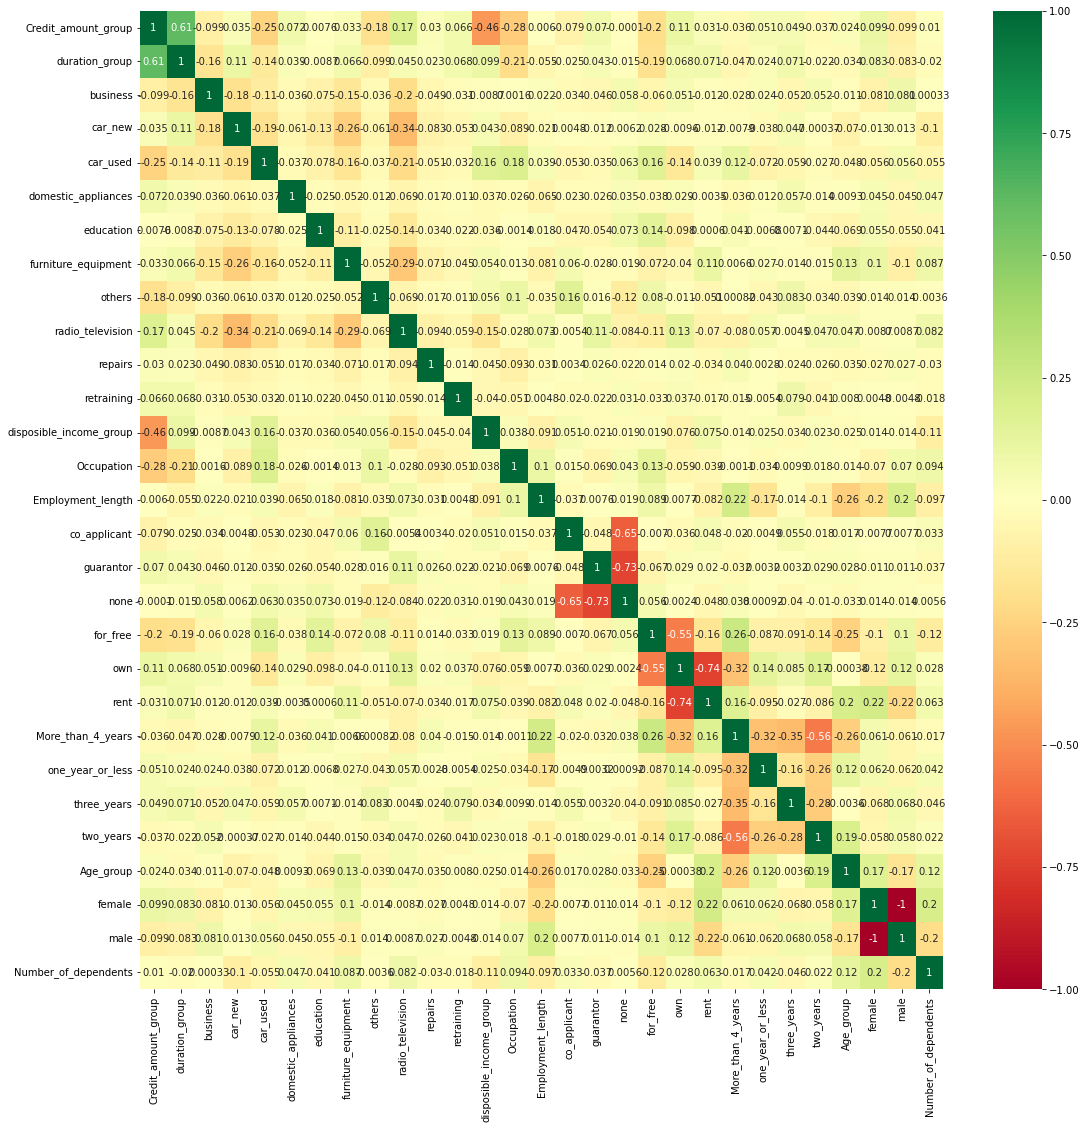

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [76]:
x.drop(['female','male'], axis =1, inplace=True)

In [85]:
data.columns

Index(['duration_group', 'disposible_income_group', 'Purpose', 'Occupation',
       'Employment_length', 'Credit_amount_group',
       'Other_debtors_or_guarantors', 'Housing', 'Residence_length',
       'Age_group', 'Sex', 'Personal_status', 'Number_of_dependents',
       'Outcome', 'Risk(Outcome_text)', 'dur_score', 'disinc_score',
       'purpose_score', 'Occupation_score', 'PresentEmployemntSince_score',
       'CreditAmt_score', 'Otherdebtors_score', 'Housing_score',
       'PresentResidenceSince_score', 'Age_score', 'Sex_score',
       'PersonalStatus_score', 'Dependents_score', 'averagescore'],
      dtype='object')

In [86]:
data['Averagescore'] = round(df_discret.iloc[:,[15,16,17,18,19,20,21,22,23,24,26,27]].mean(axis=1) ,0)
data.head()

,duration_group,disposible_income_group,Purpose,Occupation,Employment_length,Credit_amount_group,Other_debtors_or_guarantors,Housing,Residence_length,Age_group,...,CreditAmt_score,Otherdebtors_score,Housing_score,PresentResidenceSince_score,Age_score,Sex_score,PersonalStatus_score,Dependents_score,averagescore,Averagescore
0,15,3,radio_television,3,5,10,none,own,More_than_4_years,2,...,627.0,624.0,630.0,576.0,620.0,628.0,629.0,624.0,623.0,624.0
1,7,4,radio_television,3,3,8,none,own,two_years,11,...,614.0,624.0,630.0,578.0,609.0,618.0,618.0,624.0,620.0,617.0
2,14,5,education,2,4,9,none,own,three_years,6,...,635.0,624.0,630.0,574.0,637.0,628.0,629.0,625.0,623.0,623.0
3,8,5,furniture_equipment,3,4,7,guarantor,for_free,More_than_4_years,7,...,614.0,641.0,611.0,576.0,627.0,628.0,629.0,625.0,621.0,620.0
4,12,4,car_new,3,3,8,none,for_free,More_than_4_years,5,...,614.0,624.0,611.0,576.0,626.0,628.0,629.0,625.0,619.0,619.0


In [88]:
y = data[['Averagescore']]
y.head()

,Averagescore
0,624.0
1,617.0
2,623.0
3,620.0
4,619.0


# Train model

In [89]:
#!pip install --upgrade scikit-learn
#!pip install scikit-learn==1.0.2
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [90]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

# https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [91]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

C:\Users\griev\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [92]:
reg_rf.score(x_test, y_test)

0.8080278277927629

In [93]:
#from sklearn.ensemble import XGBRegressor
#import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor(learning_rate= 0.1454899952347399, subsample = 0.9997401600922698, max_leaves = 200, max_depth = 27, gamma =  0.0005580171310868371,
  colsample_bytree = 0.9353259321058679,
  min_child_weight = 0)

In [94]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9353259321058679, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0005580171310868371,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1454899952347399,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=27, max_leaves=200,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
y_pred_xg = xgbr.predict(x_test)

In [96]:
xgbr.score(x_test, y_test)

0.8170280750280681

# Test model

In [97]:
#reg_rf.score(x_train, y_train)

# Save model

In [98]:
import pickle
#https://www.youtube.com/watch?v=lrShBmW8Iqs
# install requirement.txt file - https://stackoverflow.com/questions/66899666/how-to-install-from-requirements-txt

In [99]:
x_train.columns

Index(['Credit_amount_group', 'duration_group', 'business', 'car_new',
       'car_used', 'domestic_appliances', 'education', 'furniture_equipment',
       'others', 'radio_television', 'repairs', 'retraining',
       'disposible_income_group', 'Occupation', 'Employment_length',
       'co_applicant', 'guarantor', 'none', 'for_free', 'own', 'rent',
       'More_than_4_years', 'one_year_or_less', 'three_years', 'two_years',
       'Age_group', 'Number_of_dependents'],
      dtype='object')

# RF Regressor

# XGBR